In [20]:
from netCDF4 import Dataset
import xarray as xr
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
np.random.randint([1, 5, 7], 10)


array([9, 6, 7])

In [3]:
a = np.random.uniform(-1, 1, size=(10,8))

In [4]:
a

array([[ 4.80413321e-01,  9.92740966e-01, -9.94822982e-02,
         1.22009792e-01, -4.10131952e-01, -1.00261673e-01,
        -1.62972082e-01, -7.21027677e-01],
       [-6.87437606e-01,  6.20852369e-01,  2.52836599e-01,
        -5.81793091e-01,  6.27299420e-01, -6.31265826e-01,
         2.82962767e-01,  4.44934764e-01],
       [-6.98260197e-01,  4.64658294e-02,  3.96111248e-01,
        -8.85031653e-03, -2.82752468e-01, -6.00851941e-01,
         4.75215743e-01,  1.11701870e-01],
       [ 3.52953871e-01,  2.22848269e-01, -3.12407758e-02,
         8.51147592e-01,  8.24988506e-01,  3.68111497e-04,
         1.19286214e-01, -9.90835701e-01],
       [-1.66186007e-01, -4.15500590e-01,  1.06456126e-01,
         5.75002390e-01,  5.62729167e-01, -4.42590361e-01,
         9.77293725e-01, -9.43109534e-01],
       [-3.41550205e-01,  4.93347129e-01, -1.91685360e-03,
        -9.58554470e-01,  9.53365104e-01, -9.23190152e-01,
        -8.63251304e-01, -7.50072102e-01],
       [-1.61126940e-01,  8.694124

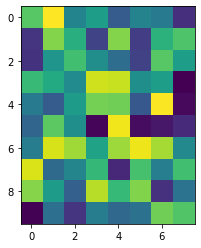

In [5]:
plt.imshow(a)

In [6]:
def sharpen_filter(mat):
    kernel = np.array([[0, -1, 0],
                   [-1, 1,-1],
                   [0, -1, 0]])
    return cv2.filter2D(src=mat, ddepth=-1, kernel=kernel)

In [7]:
image_sharp = sharpen_filter(a)
image_sharp
#plt.imshow(image_sharp)

array([[-0.1301934 , -0.6298948 , -1.71990625,  1.79521022, -1.68647891,
         1.73537401,  0.09239173, -1.28495304],
       [-1.71129547,  0.01624658, -0.08285163, -1.57508859,  2.53324276,
        -0.8404144 ,  0.15705017,  0.48833504],
       [-0.45670812, -0.49508586,  0.13689991, -0.3915636 , -1.12533814,
        -0.1624175 ,  0.56211683, -0.29282868],
       [ 0.77170354,  0.27016993, -1.60780401, -0.50875221, -0.3065039 ,
         0.09953569, -0.34275566, -0.39800046],
       [ 0.65341151, -1.07196611, -0.01988804,  0.01322397, -1.34803647,
        -1.05979121,  3.10695871, -1.15678918],
       [-1.00093152,  0.38290236, -0.3547308 , -2.63731322,  1.56802703,
        -1.51027565, -0.89510565,  1.97803002],
       [-2.43694198,  0.13072984, -0.21679028, -0.63868229, -0.57290553,
         0.01495548,  0.85360203, -1.15968309],
       [ 1.01970941, -2.06743989, -0.44657649,  0.26441548, -2.56109039,
        -0.23042722, -0.9724485 ,  0.9730796 ],
       [ 0.51940114,  0.43588434

In [103]:
data_addr_nn = '/work/ollie/bpanthi/NN_gulf/ssh_gridded_1961_001_01'+'_new.nc'
ds = xr.open_dataset(data_addr_nn)
lon = [ds["LONGITUDE"].values.min(), ds["LONGITUDE"].values.max()]
lat = [ds["LATITUDE"].values.min(), ds["LATITUDE"].values.max()]

last_day = ds["TIME"].size
a = ds['ssh'][0].values
fill_value = 9.96920997e+36

In [107]:
a

array([[ 1.13574572e-01,  1.13942340e-01,  1.16624527e-01, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [ 1.15315884e-01,  1.13961361e-01,  1.16671510e-01, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       [ 1.16391659e-01,  1.15775175e-01,  1.17220640e-01, ...,
         9.96920997e+36,  9.96920997e+36,  9.96920997e+36],
       ...,
       [ 2.03091721e-03,  2.77221645e-03,  3.53964302e-03, ...,
        -1.06377697e+00, -1.06390488e+00, -1.05749071e+00],
       [ 1.50524080e-03,  2.13052914e-03,  2.76105339e-03, ...,
        -1.06625414e+00, -1.06629205e+00, -1.06175590e+00],
       [ 1.65992603e-03,  2.23827688e-03,  2.80320481e-03, ...,
        -1.06791723e+00, -1.06901658e+00, -1.06512237e+00]])

In [140]:
mask = a > 1000
new_mat = np.copy(a)
new_mat[mask] = np.nan
neg_mask = (new_mat < 0) | (new_mat == np.nan)
pos_mask = (new_mat >= 0) | (new_mat == np.nan)
neg_mat = np.copy(new_mat)
neg_mat[~neg_mask] = 0
pos_mat = np.copy(new_mat)
pos_mat[~pos_mask] = 0
sharpen_neg_mat = sharpen_filter(neg_mat*-1)
sharpen_pos_mat = sharpen_filter(pos_mat)


In [141]:
new_mat

array([[ 0.11357457,  0.11394234,  0.11662453, ...,         nan,
                nan,         nan],
       [ 0.11531588,  0.11396136,  0.11667151, ...,         nan,
                nan,         nan],
       [ 0.11639166,  0.11577518,  0.11722064, ...,         nan,
                nan,         nan],
       ...,
       [ 0.00203092,  0.00277222,  0.00353964, ..., -1.06377697,
        -1.06390488, -1.05749071],
       [ 0.00150524,  0.00213053,  0.00276105, ..., -1.06625414,
        -1.06629205, -1.0617559 ],
       [ 0.00165993,  0.00223828,  0.0028032 , ..., -1.06791723,
        -1.06901658, -1.06512237]])

In [143]:
neg_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -1.06377697,
        -1.06390488, -1.05749071],
       [ 0.        ,  0.        ,  0.        , ..., -1.06625414,
        -1.06629205, -1.0617559 ],
       [ 0.        ,  0.        ,  0.        , ..., -1.06791723,
        -1.06901658, -1.06512237]])

In [131]:
pos_mat[2,2]

0.11722064018249512

In [133]:
sharpen_neg_mat[~neg_mask] = 0
sharpen_pos_mat[~pos_mask] = 0

In [134]:
final_mat = sharpen_neg_mat + sharpen_pos_mat
final_mat[mask] = fill_value

In [66]:
temp1 = np.copy(a)
temp2 = np.copy(final_mat)

In [68]:
temp1[temp1<0] = -1
temp1[temp1>=0] = 1
temp2[temp2>=0] = 1
temp2[temp2<0] = -1

In [73]:
temp2

array([[-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

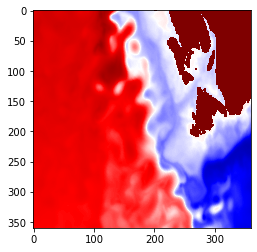

In [135]:
plt.imshow(a, cmap=cm.seismic, vmin=-1.5, vmax=0.5)

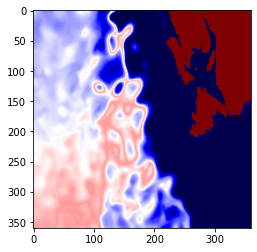

In [137]:
plt.imshow(final_mat, cmap=cm.seismic, vmin=-1.5, vmax=1)